## TO DO:

- Add more comments
- Add more tests, also for timing and efficiency

##### Imports

In [1]:
import random
random.seed(10)

import numpy as np

import matplotlib.pyplot as plt

## 1. Agent-Based Modelling

In [2]:
y0, x0 = 50, 50 # y then x because of reading image files
print('Initial: ',x0,y0)

# import random
random.seed(10)

def perturb(x): 
    return x + random.choice([-1,1])

x0, y0 = perturb(x0), perturb(y0) 
print('Perturbed: ',x0, y0)

x, y = x0, y0
for _ in range(5):
    x, y = perturb(x), perturb(y)
print('5 more steps... ', x, y)

# import numpy as np

def distance(x0,y0,x1,y1):
    return np.sqrt((x1-x0)**2 + (y1-y0)**2)

distance(x0,y0,x,y)

Initial:  50 50
Perturbed:  49 51
5 more steps...  50 52


1.4142135623730951

## 2. Code Shrinking I

In [3]:
agents = []
random.seed(10)
for _ in range(2):
    agents.append([random.randint(0,99),random.randint(0,99)])
agents

[[73, 4], [54, 61]]

In [4]:
print('Normal: ',max(agents))

import operator
print('itemgetter: ',max(agents,key=operator.itemgetter(1)))

# or use custom:
def second(l):
    return l[1]
print('Custom key: ',max(agents,key=second))

Normal:  [73, 4]
itemgetter:  [54, 61]
Custom key:  [54, 61]


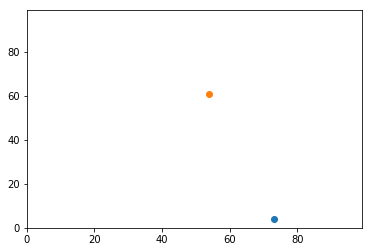

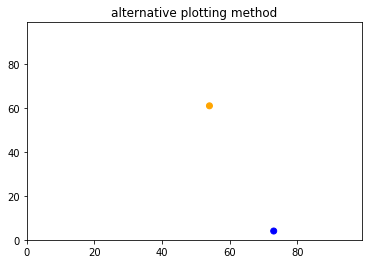

In [5]:
#import matplotlib.pyplot as plt
plt.ylim(0, 99)
plt.xlim(0, 99)
plt.scatter(agents[0][0],agents[0][1])
plt.scatter(agents[1][0],agents[1][1])
plt.show()

# alternative plotting method using numpy slicing
np_agents = np.array(agents)
plt.ylim(0, 99)
plt.xlim(0, 99)
plt.scatter(np_agents[:,0],np_agents[:,1],c=['blue','orange'])
plt.title('alternative plotting method')
plt.show()

## 3. Code Skrinking II

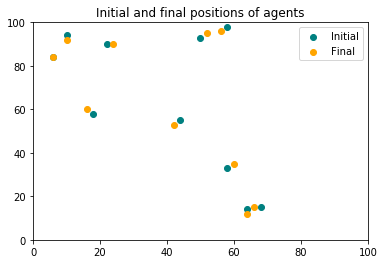

In [6]:
random.seed(100)

#### INITIALISE

num_of_agents = 10
agents = []
for _ in range(num_of_agents):
    agents.append([random.randint(0,100),random.randint(0,100)])

#### UPDATE POSITIONS

agents_new = agents.copy()
for i in range(len(agents)):
    x,y = agents[i]
    for _ in range(2):
        x, y = perturb(x), perturb(y)
    # update agent coordinates
    agents_new[i] = [x,y]

#### PLOT 

# plot initial positions
np_agents = np.array(agents)
plt.scatter(np_agents[:,0],np_agents[:,1],c='teal',label='Initial')
# plot final positions
np_agents_new = np.array(agents_new)
plt.scatter(np_agents_new[:,0],np_agents_new[:,1],c='orange',label='Final')

plt.title('Initial and final positions of agents')
plt.ylim(0, 100)
plt.xlim(0, 100)
plt.legend()
plt.show()

Dealing with boundries...

In [7]:
def perturb_new(x): 
    return (x + random.choice([-1,1])) % 100

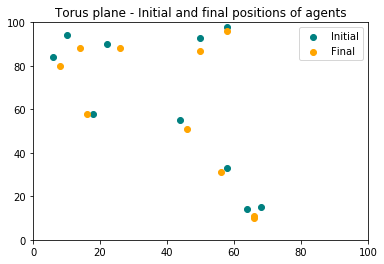

In [8]:
random.seed(100)

#### INITIALISE

num_of_agents = 10
agents = []
for _ in range(num_of_agents):
    agents.append([random.randint(0,100),random.randint(0,100)])

#### UPDATE POSITIONS

agents_new = agents.copy()
for i in range(len(agents)):
    x,y = agents[i]
    for _ in range(10):
        x, y = perturb_new(x), perturb_new(y)
    # update agent coordinates
    agents_new[i] = [x,y]

#### PLOT 

# plot initial positions
np_agents = np.array(agents)
plt.scatter(np_agents[:,0],np_agents[:,1],c='teal',label='Initial')
# plot final positions
np_agents_new = np.array(agents_new)
plt.scatter(np_agents_new[:,0],np_agents_new[:,1],c='orange',label='Final')

plt.title('Torus plane - Initial and final positions of agents')
plt.ylim(0, 100)
plt.xlim(0, 100)
plt.legend()
plt.show()

## 4. Building Tools

In [9]:
# import time
# start = time.clock()
# # The code to run, here.
# end = time.clock()
# print("time = " + str(end - start))

In [10]:
def distance_between(agents_row_a, agents_row_b):
    return np.sqrt(
        ((agents_row_a[0] - agents_row_b[0])**2) 
        + ((agents_row_a[1] - agents_row_b[1])**2))

Min:  1.0  Max:  93.74


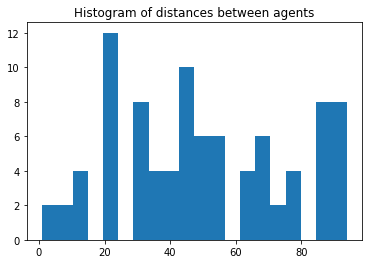

In [11]:
dists = []
for i in range(num_of_agents):
    agent_a = agents_new[i]
    for j in range(num_of_agents):
        # 2. Don't check against itself
        if i != j:
            agent_b = agents_new[j]
            dists.append(distance_between(agent_a,agent_b))
print('Min: ',round(min(dists),2),' Max: ',round(max(dists),2))
plt.hist(dists,bins=20)
plt.title('Histogram of distances between agents')
plt.show()

#### Do the above for different number of agents:

In [12]:
def run_sim(num_of_agents,num_runs,plot=False):
    
    random.seed(100)
    
    #### INITIALISE
    agents = []
    for _ in range(num_of_agents):
        agents.append([random.randint(0,100),random.randint(0,100)])

    #### UPDATE POSITIONS

    agents_new = agents.copy()
    for i in range(len(agents)):
        x,y = agents[i]
        for _ in range(num_runs):
            x, y = perturb_new(x), perturb_new(y)
        # update agent coordinates
        agents_new[i] = [x,y]
    
    if plot:
        #### PLOT 

        # plot initial positions
        np_agents = np.array(agents)
        plt.scatter(np_agents[:,0],np_agents[:,1],c='teal')
        # plot final positions
        np_agents_new = np.array(agents_new)
        plt.scatter(np_agents_new[:,0],np_agents_new[:,1],c='orange')

        plt.ylim(0, 100)
        plt.xlim(0, 100)
        plt.show()
    
    dists = []
    for i in range(num_of_agents):
        agent_a = agents_new[i]
        for j in range(num_of_agents):
            # 2. Don't check against itself
            if i != j:
                agent_b = agents_new[j]
                dists.append(distance_between(agent_a,agent_b))
    
    return dists

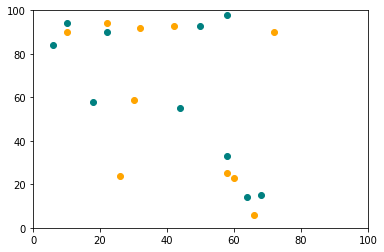

In [13]:
# test
dists = run_sim(10,100,True)

In [14]:
# Time it...
import time

In [15]:
times = []
Ns_to_test = list(range(1,800,50))

for n in Ns_to_test:
    start = time.clock()
    _ = run_sim(n,100)
    end = time.clock()
    times.append(end - start)

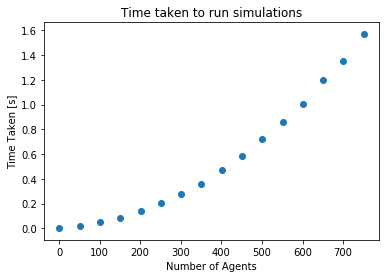

In [16]:
plt.scatter(Ns_to_test,times)
plt.title('Time taken to run simulations')
plt.ylabel('Time Taken [s]')
plt.xlabel('Number of Agents')
plt.show()

## 5. Agents!

In [17]:
import agentframework as af

def distance_between(agents_row_a, agents_row_b):
    return np.sqrt(
        ((agents_row_a[0] - agents_row_b[0])**2) 
        + ((agents_row_a[1] - agents_row_b[1])**2))

In [22]:
agent_1 = af.Agent([],[]) # [],[] for backward compatibility of agentframework
print(agent_1.x, agent_1.y)

85 55


In [23]:
agent_1.set_x(10)
agent_1.set_y(10)
print(agent_1.x, agent_1.y)

10 10


In [24]:
agent_1.move()
print(agent_1.x, agent_1.y)

11 11


#### Testing (from Lectures)

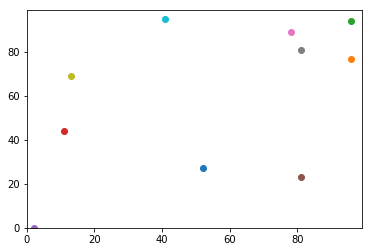

In [31]:
import random
import operator
import matplotlib.pyplot
import agentframework

def distance_between(agents_row_a, agents_row_b):
    return (((agents_row_a.x - agents_row_b.x)**2) +
    ((agents_row_a.y - agents_row_b.y)**2))**0.5

num_of_agents = 10
num_of_iterations = 100
agents = []

# Make the agents.
for i in range(num_of_agents):
    agents.append(agentframework.Agent([],[])) # [],[] for backward compatibility of agentframework

# Move the agents.
for j in range(num_of_iterations):
    for i in range(num_of_agents):
        agents[i].move()

matplotlib.pyplot.xlim(0, 99)
matplotlib.pyplot.ylim(0, 99)
for i in range(num_of_agents):
    matplotlib.pyplot.scatter(agents[i].x,agents[i].y)
matplotlib.pyplot.show()

for agents_row_a in agents:
    for agents_row_b in agents:
        distance = distance_between(agents_row_a, agents_row_b)

#### Testing (personal)

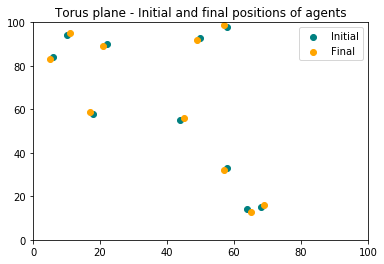

In [32]:
import agentframework as af
import numpy as np
import matplotlib.pyplot as plt
random.seed(100)

#### INITIALISE

num_of_agents = 10
agents = []
for _ in range(num_of_agents):
    agents.append(af.Agent([],[])) # [],[] for backward compatibility of agentframework 

# plot initial positions
np_agents = np.array([[agent.x,agent.y] for agent in agents])
plt.scatter(np_agents[:,0],np_agents[:,1],c='teal',label='Initial')

#### UPDATE POSITIONS

for i in range(len(agents)):
    agents[i].move()

# plot final positions
np_agents_new = np.array([[agent.x,agent.y] for agent in agents])
plt.scatter(np_agents_new[:,0],np_agents_new[:,1],c='orange',label='Final')

plt.title('Torus plane - Initial and final positions of agents')
plt.ylim(0, 100)
plt.xlim(0, 100)
plt.legend()
plt.show()

## 6. I/O

In [33]:
environment = []

with open('data/in.txt') as f:
    for line in f:
        parsed_line = line.split(',')
        rowlist = []
        for value in parsed_line:
            rowlist.append(int(value))

        environment.append(rowlist)

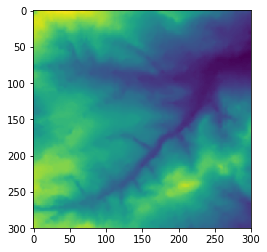

In [34]:
plt.imshow(environment)
plt.show()

Eating...

In [ ]:
import agentframework as af
import random
import numpy as np
import matplotlib.pyplot as plt
random.seed(100)

#### INITIALISE

environment = []
with open('data/in.txt') as f:
    for line in f:
        parsed_line = line.split(',')
        rowlist = []
        for value in parsed_line:
            rowlist.append(int(value))
        environment.append(rowlist)
        
        
num_of_agents = 10
agents = []
for _ in range(num_of_agents):
    agents.append(af.Agent(environment,agents))


# plot initial positions
np_agents = np.array([[agent.x,agent.y] for agent in agents])
plt.scatter(np_agents[:,0],np_agents[:,1],c='white',label='Initial')
plt.imshow(environment)
plt.ylim(0, 100)
plt.xlim(0, 100)
plt.title('Initial')
plt.show()


#### MOVE AND EAT

num_steps = 200
for _ in range(num_steps):
    for i in range(len(agents)):
        agents[i].move()
        agents[i].eat()

# plot final positions
np_agents_new = np.array([[agent.x,agent.y] for agent in agents])
plt.scatter(np_agents_new[:,0],np_agents_new[:,1],c='white',label='Final')
plt.imshow(environment)

plt.title('Final')
#plt.legend()
plt.ylim(0, 100)
plt.xlim(0, 100)
plt.show()

#### Extras

In [ ]:
# write out environment file
import pandas as pd
pd.DataFrame(environment).to_csv('data/in_final.txt')

# write stores
stores = [agent.store for agent in agents]
pd.Series(stores).to_csv('data/stores.txt')

# eat what's left: done in agentframework.py file

# sick up 50 if eaten 100, in agentframework.py file

## 7. Communicating

In [ ]:
import agentframework as af
import random
import numpy as np
import matplotlib.pyplot as plt
random.seed(100)

# global variables

num_of_agents = 10
num_steps = 200
neighbourhood = 20 # NEW

#### INITIALISE

environment = []
with open('data/in.txt') as f:
    for line in f:
        parsed_line = line.split(',')
        rowlist = []
        for value in parsed_line:
            rowlist.append(int(value))
        environment.append(rowlist)
        
        
agents = []
for _ in range(num_of_agents):
    agents.append(af.Agent(environment,agents)) 
    # the agents list will update, and since only a link is given to the agents,
    # everyone will get a full list

# TEST each agent has list of others
print(agents[0].agents[6].x,agents[0].agents[6].y)
print(agents[6].x,agents[6].y)
#agents[0].share_with_neighbours(neighbourhood)

# plot initial positions
np_agents = np.array([[agent.x,agent.y] for agent in agents])
plt.scatter(np_agents[:,0],np_agents[:,1],c='white',label='Initial')
plt.imshow(environment)
plt.ylim(0, 100)
plt.xlim(0, 100)
plt.title('Initial')
plt.show()


### MOVE AND EAT

for _ in range(num_steps):
    for i in range(len(agents)):
        agents[i].move()
        agents[i].eat()
        agents[i].share_with_neighbours(neighbourhood)

# plot final positions
np_agents_new = np.array([[agent.x,agent.y] for agent in agents])
plt.scatter(np_agents_new[:,0],np_agents_new[:,1],c='white',label='Final')
plt.imshow(environment)

plt.title('Final')
#plt.legend()
plt.ylim(0, 100)
plt.xlim(0, 100)
plt.show()